# Analysis of the Cadmus Vermont Heat Pump Study

In [43]:
import pandas as pd
import numpy as np
# import matplotlib pyplot commands
from matplotlib.pyplot import *
from IPython.display import Image, Markdown
 
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

In [44]:
rcParams['figure.figsize']= (10, 8)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

## Analyze Heat Pump Power vs. Outdoor Temperature

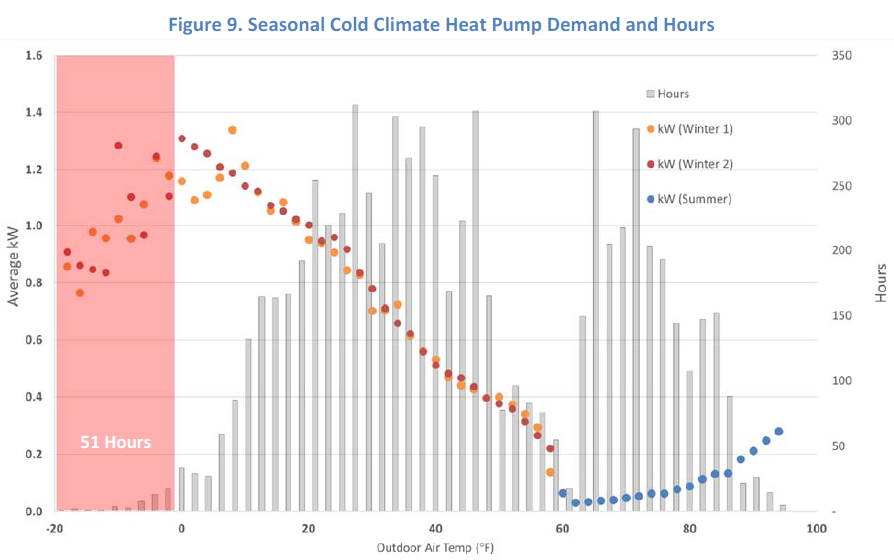

In [27]:
# Here is the graph, Figure 9 page 16
Image('demand_vs_oat.png')

In [46]:
Markdown('*Hello* there.')

*Hello* there.

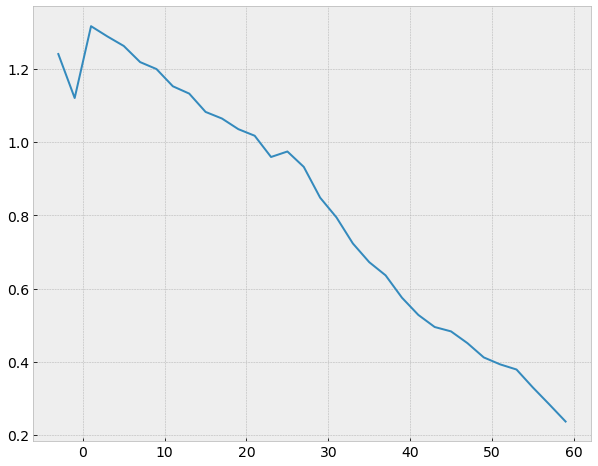

In [32]:
# Used https://apps.automeris.io/wpd/ to digitize this plot.
# First Bin is -3 F, each bin is 2 F wide.
# This is the Winter 2 series
# Ignore the X value, as we know the exact spacing
power = """-3.0, 1.24
-1.0, 1.12
0.373, 1.316
2.412, 1.288
4.374, 1.262
6.410, 1.218
8.373, 1.199
10.409, 1.152
12.451, 1.132
14.407, 1.082
16.370, 1.064
18.275, 1.035
20.373, 1.017
22.327, 0.959
24.377, 0.974
26.256, 0.932
28.362, 0.848
30.238, 0.794
32.346, 0.723
34.302, 0.672
36.182, 0.636
38.293, 0.575
40.250, 0.528
42.210, 0.495
44.253, 0.483
46.135, 0.451
48.172, 0.412
50.135, 0.393
52.257, 0.379
54.292, 0.330
56.092, 0.284
58.206, 0.237
"""
kW = []
for lin in power.split('\n'):
    if len(lin.strip()):
        t, p = lin.split(',')
        kW.append(float(p))
# Now interpolate fixed bin values
tp_bins = np.arange(-3, 61, 2)
plot(tp_bins, kW)

<Container object of 48 artists>

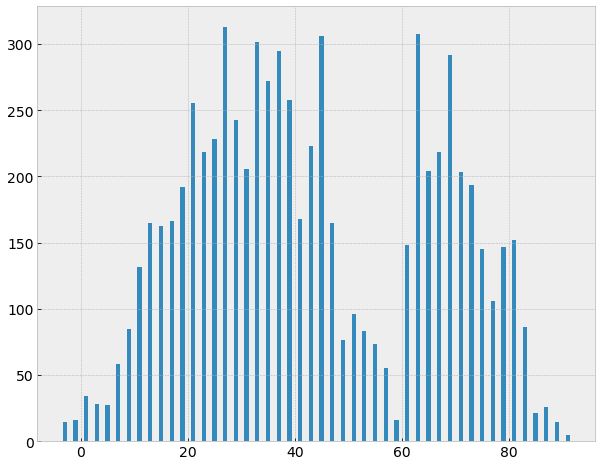

In [39]:
# First Bar is -3 F bin
# Each bin is 2 F wide
# There are 21 hours below the -3 F bin that are not included, but all other
# hours are.
hours = """Bar0, 14.4
Bar1, 16.3
Bar2, 34.0
Bar3, 27.9
Bar4, 27.5
Bar5, 58.6
Bar6, 84.7
Bar7, 131.7
Bar8, 164.8
Bar9, 162.9
Bar10, 166.2
Bar11, 192.2
Bar12, 255.5
Bar13, 218.3
Bar14, 228.1
Bar15, 312.8
Bar16, 243.0
Bar17, 205.3
Bar18, 301.6
Bar19, 271.8
Bar20, 295.1
Bar21, 257.4
Bar22, 168.0
Bar23, 222.9
Bar24, 306.3
Bar25, 164.8
Bar26, 76.8
Bar27, 95.9
Bar28, 83.3
Bar29, 73.5
Bar30, 55.4
Bar31, 16.3
Bar32, 148.5
Bar33, 307.6
Bar34, 203.9
Bar35, 218.3
Bar36, 291.8
Bar37, 203.4
Bar38, 193.6
Bar39, 145.2
Bar40, 106.1
Bar41, 146.6
Bar42, 151.7
Bar43, 86.6
Bar44, 21.4
Bar45, 26.1
Bar46, 14.9
Bar47, 4.7
"""
hrs = []
for lin in hours.split('\n'):
    if len(lin.strip()):
        l, h = lin.split(',')
        hrs.append(float(h))
th_bins = np.arange(-3, 93, 2)
bar(th_bins, hrs, )


In [20]:
sum(hrs), max(hrs)
# Even adding the missing 21 hours, hour total is only 7233.  
# They indicate a 7,230 hour total, so my digitization must have been good.
# The text on page 16 explains why.  It is related to the weather normalization
# that occurred.

(7203.700000000001, 312.8)

In [38]:
# Calculate Heating kWh.  Assume 1.05 kW for the missing 21 hours
(np.array(hrs[:len(kW)]) * np.array(kW)).sum() + 21.0 * 1.05
# Answer is quite a bit higher than the 2,085 kWh stated in Table 1, page 3

3891.1892